# Индивидуальное задание
## «А/В-тестирование»

В этом задании мы предлагаем вам пройти все этапы А/В-тестирования, используя предложенные наборы данных.

## Задание

Интернет-магазин «Фитнес-мания», занимающийся продажей спортивных товаров, хочет увеличить количество клиентов, которые переходят на сайт через email-рассылки. Для этого команда планирует провести A/B-тестирование.

## Что нужно сделать

### Задание 1

Перед вами представлен набор гипотез со средними оценками от членов команды. А/В-тестирование продакт планирует запустить в ближайшую неделю.  
Проанализируйте таблицу и выберите гипотезу, которую следует взять в работу в первую очередь. Объясните свой выбор гипотезы.

Для приоритизации гипотез используйте инструменты ICE и RICE. Необходимо составить таблицу с оценками гипотез по методологиям ICE и RICE.

### Задание 2

Определите метрики эксперимента: ключевую и смежную. Поясните, почему вы выбрали именно эти метрики.

### Задание 3a

По историческим данным предположите дату проведения предыдущей акции.  
Посчитайте, на сколько в период проведения этой акции увеличилось количество кликов.

Файлы с историческими данными:
- список пользователей по датам, которые открыли письмо из рассылки (файл **Data for MDE - opened.csv**);
- список пользователей, которые совершили переход из письма (файл **Data for MDE - clicked.csv**).

### Задание 3b

По этим же историческим данным проверьте - увеличила ли акция статистически значимо конверсию из открытия письма в переход (клик).

1. Сформулируйте нулевую и альтернативную гипотезы для проверки.
2. Определите с каким параметром статистической значимости вы будете смотреть результаты.

Выполняя расчет, вы можете использовать любой доступный вам инструмент.

### Задание 4a

Опишите AB-тест для пункта “Использовать более яркие и привлекательные заголовки в email-рассылках, чтобы привлечь внимание клиентов и заставить их нажать на ссылку” из задания 1.

Ответьте на 3 пункта ниже:
1. Сформулируйте нулевую и альтернативную гипотезы для проверки.
2. Определите с какими параметрами (уровень статистической значимости, размер выборки и параметры статистических тестов, такие как двусторонняя или односторонняя гипотеза и т. д.) вы будете проводить тестирование.
3. В зависимости от выбранных параметров рассчитайте требуемый размер выборки для анализа данных эксперимента.

При выполнении задания учитывайте, что на период тестирования новой фичи мы увеличим количество рассылаемых писем в 3 раза, и соответственно ожидаем, что количество открывших эти письма пропорционально увеличится примерно до 240 в день.

Выполняя расчет, вы можете использовать любой доступный вам инструмент.

### Задание 4b

Вопросы с выбором правильного ответа:

**1. Какой параметр в статистическом тесте задаёт вероятность ошибки 1-го рода, т.е. когда мы неверно отвергаем нулевую гипотезу?**

Варианты ответа:
- Уровень статистической значимости
- Мощность статистического теста
- Степень однородности выборки
- Все перечисленные параметры
- Ни один из вариантов

**2. За вероятность ошибок 2-го рода отвечает параметр:**

Варианты ответа:
- Уровень статистической значимости
- Мощность статистического теста
- Тип гипотезы
- Все перечисленные параметры
- Ни один из вариантов

**3. Как изменится требуемый размер выборки при уменьшении вероятности ошибки 1-го рода (при неизменных остальных параметрах)?**

Варианты ответа:
- Уменьшится
- Увеличится
- Не изменится
- Зависит от статистического критерия

### Задание 5

Вы получили выгрузку по данным эксперимента за первые четыре дня после запуска.  
Проанализируйте корректность течения эксперимента, сделайте и зафиксируйте свои выводы.

Файл с данными — **Data for monitoring - first 4 days.csv**.

Важно: при проведении эксперимента в данных может присутствовать не одна аномалия. Придумайте, какими способами вы можете выявить аномалии в ходе эксперимента.

### Задание 6

После окончания А/В-теста вы получили файл с выгрузкой результатов (**Data for results.csv**).

- Рассчитайте статистическую значимость различий между группами.
- Сделайте выводы по проведенному расчету и интерпретируйте полученный результат.
- Проведите статистические тесты с различным уровнем статистической значимости (0.001, 0.01, 0.05, 0.15).

### Задание 7

Используя искусственные данные (например, сгенерированные из нормального распределения) выполните множественную проверку гипотез (для 5 гипотез) с помощью поправки Бонферрони или других методов, применимых для проблемы множественного тестирования.

Для проверки используйте уровень статистической значимости 0.05.

---

#### Библиотеки

In [3]:
# AMBROSIA

from ambrosia.designer import Designer, design_binary
from ambrosia.splitter import Splitter
from ambrosia.tester import Tester
from ambrosia.preprocessing import AggregatePreprocessor

# OTHERS

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as sts
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Настройка стиля
plt.style.use('classic')
palette = sns.color_palette("husl", 8)
%matplotlib inline

# Для изображения
from IPython.display import Image

#### Перед тем, как начать

Для проверки поставленных гипотез с целью упрощения построения пайплайна я буду использовать Open-Source библиотеку для проведения A/B тестирования `Ambrosia`.

Ниже указан ряд ссылок, по которым можно ознакомиться с функционалом библиотеки более подробно.

- [Ambrosia на GitHub: репозиторий, примеры реализации](https://github.com/MobileTeleSystems/Ambrosia)
- [Статья Аслана Байрамкулова и Артема Хакимова из Big Data МТС на Хабре про Ambrosia](https://habr.com/ru/companies/ru_mts/articles/700992/)
- [Официальная документация Ambrosia](https://ambrosia.readthedocs.io/en/latest/)
- [ODS Reliable ML AB Testing & Causal Inference Meetup. Аслан Байрамкулов | Ambrosia - open-source библиотека для быстрой и удобной работы с A/B тестами](https://youtu.be/W8u-4zt1RSM?si=syqpM_6fUTbSvSp9)
- [Семинар: Артём Хакимов – Ambrosia, open source-библиотека для A/B тестов и экспериментов](https://www.youtube.com/watch?v=nFIeouvE2gk&ab_channel=NoML)

#### О бинарных метриках в `Ambrosia` при дизайне эксперимента (класс `Designer`)

Для бинарных данных мы можем использовать либо метод "theory", либо метод "binary".

- Метод **"theory"** выполняет численный расчёт параметров, используя различные аппроксимации.  
- Метод **"binary"** осуществляет оценку параметров на основе многократной генерации выбранного доверительного интервала.  
  Некоторые из этих интервалов являются достаточно экзотичными и требуют отдельного изучения для осознанного применения.  
  По умолчанию используется стандартный интервал Вальда (Wald interval). 

#### Подготовка данных

In [7]:
df_mde_clicked = pd.read_csv('Data for MDE - clicked.csv')
df_mde_opened = pd.read_csv('Data for MDE - opened.csv')
df_monitoring = pd.read_csv('Data for monitoring - first 4 days.csv')
df_results = pd.read_csv('Data for results.csv')

In [8]:
df_mde_clicked, df_mde_opened

(           date  user_id
 0    01.01.2023   101240
 1    01.01.2023   101241
 2    01.01.2023   101242
 3    01.01.2023   101243
 4    01.01.2023   101244
 ..          ...      ...
 485  28.02.2023   106053
 486  28.02.2023   106054
 487  28.02.2023   106055
 488  28.02.2023   106056
 489  28.02.2023   106057
 
 [490 rows x 2 columns],
             date  user_id
 0     01.01.2023   101232
 1     01.01.2023   101233
 2     01.01.2023   101234
 3     01.01.2023   101235
 4     01.01.2023   101236
 ...          ...      ...
 4848  28.02.2023   106080
 4849  28.02.2023   106081
 4850  28.02.2023   106082
 4851  28.02.2023   106083
 4852  28.02.2023   106084
 
 [4853 rows x 2 columns])

In [9]:
df_monitoring, df_results

(           date      group  user_id  converted
 0    01.03.2023    control   106085          1
 1    01.03.2023    control   106086          1
 2    01.03.2023    control   106087          1
 3    01.03.2023    control   106088          1
 4    01.03.2023    control   106089          1
 ..          ...        ...      ...        ...
 961  04.03.2023  treatment   107046          0
 962  04.03.2023  treatment   107047          0
 963  04.03.2023  treatment   107048          0
 964  04.03.2023  treatment   107049          0
 965  04.03.2023  treatment   107050          0
 
 [966 rows x 4 columns],
             date      group  user_id  converted
 0     01.03.2023    control   106085          1
 1     01.03.2023    control   106086          1
 2     01.03.2023    control   106087          1
 3     01.03.2023    control   106088          1
 4     01.03.2023    control   106089          1
 ...          ...        ...      ...        ...
 1200  05.03.2023  treatment   107285          0
 1201

In [10]:
df_mde_clicked

,date,user_id
0,01.01.2023,101240
1,01.01.2023,101241
2,01.01.2023,101242
3,01.01.2023,101243
4,01.01.2023,101244
...,...,...
485,28.02.2023,106053
486,28.02.2023,106054
487,28.02.2023,106055
488,28.02.2023,106056


## Задание 1

Перед вами представлен набор гипотез со средними оценками от членов команды. А/В-тестирование продакт планирует запустить в ближайшую неделю.  
Проанализируйте таблицу и выберите гипотезу, которую следует взять в работу в первую очередь. Объясните свой выбор гипотезы.

Для приоритизации гипотез используйте инструменты ICE и RICE. Необходимо составить таблицу с оценками гипотез по методологиям ICE и RICE.

[Статья на Habr: "Фреймворки для проведения экспериментов и A/B-тестов"](https://habr.com/ru/companies/hygger/articles/422131/)

#### Критерии оценки (1 — мин. балл, 10 — макс. балл)

| Гипотеза | Потенциальный эффект | Охват | Уровень уверенности в правильности гипотезы | Простота реализации |
|:---------|:---------------------:|:-----:|:-------------------------------------------:|:--------------------:|
| Использовать более яркие и привлекательные заголовки в email-рассылках, чтобы привлечь внимание клиентов и заставить их нажать на ссылку | 4 | 8 | 4 | 8 |
| Улучшить мобильную версию сайта, чтобы клиенты могли легко переходить на сайт через email-рассылки с мобильных устройств. | 8 | 6 | 6 | 2 |
| Разработать более персонализированные email-рассылки, учитывая интересы и предпочтения каждого клиента, чтобы они чувствовали себя более привлеченными к переходу на сайт. | 5 | 6 | 4 | 5 |
| Сделать email-рассылки более интерактивными, например, добавить опросы или кнопки «добавить в корзину», чтобы стимулировать клиентов переходить на сайт и совершать покупки | 2 | 4 | 4 | 7 |
| Разработать систему персонализированных рекомендаций клиентам в личном кабинете. | 9 | 2 | 7 | 3 |

**Примечание:**  
В ICE учитываются Impact (влияние), Confidence (уверенность в вашей оценке охвата, влияния и трудозатрат) и Effort (трудозатраты).  
Оценка гипотез производится по формуле:

$$
\text{ICE Score} = \frac{\text{Impact} \times \text{Confidence}}{\text{Effort}}
$$

Также в методе RICE учитываются 4 фактора:  
- Reach (охват аудитории),  
- Impact (влияние),  
- Confidence (уверенность в вашей оценке охвата, влияния и трудозатрат),  
- Effort (трудозатраты).  

Итоговую оценку гипотезы получаем по формуле:

$$
\text{RICE Score} = \frac{\text{Reach} \times \text{Impact} \times \text{Confidence}}{\text{Effort}}
$$


### Задание 1: решение

| Гипотеза                                      | I | R | C | E | Effort (11-E) | ICE | RICE  |
|-----------------------------------------------|---|---|---|---|---------------|-----|-------|
| Яркие заголовки в email                       | 4 | 8 | 4 | 8 | 3             | 128 | 42,67 |
| Улучшить мобильную версию сайта               | 8 | 6 | 6 | 2 | 9             | 96  | 32,00 |
| Персонализированные email-рассылки            | 5 | 6 | 4 | 5 | 6             | 100 | 20,00 |
| Интерактивные email (опросы, кнопки)           | 2 | 4 | 4 | 7 | 4             | 56  | 8,00  |
| Персонализированные рекомендации в ЛК         | 9 | 2 | 7 | 3 | 8             | 189 | 15,75 |


**Цель:**  
Оценить предложенные гипотезы по моделям ICE и RICE и определить наиболее приоритетную для запуска А/В-теста.

#### Формулы расчета

- **ICE** (Impact, Confidence, Ease):  
  `ICE = Impact × Confidence × Ease`  
  (Ease - это "простота внедрения": чем выше оценка, тем проще реализация).

- **RICE** (Reach, Impact, Confidence, Effort):  
  `RICE = (Reach × Impact × Confidence) / Effort`  
  При этом Effort рассчитывается как `11 - Ease`, чтобы сделать шкалу трудозатрат от 1 (легко) до 10 (сложно).

#### Выводы из расчётов:

- **По ICE:**  
  Лидирует гипотеза №5 с оценкой 189, следом - гипотеза №1 с 128 баллами.  
  Метод ICE фокусируется на эффекте, уверенности и простоте внедрения, но не учитывает охват аудитории.

- **По RICE:**  
  Самая высокая оценка у гипотезы №1 - 42,67, затем идёт гипотеза №2 с результатом 32,00.  
  Формула RICE дополнительно учитывает охват пользователей и трудозатраты, что особенно важно при ограниченных ресурсах.

**Анализ гипотез:**
- Гипотеза №1 (яркие заголовки в email) имеет максимальный охват (R=8) и невысокие трудозатраты (Effort=3), что делает её лидером по RICE, несмотря на средний эффект (Impact).
- Гипотеза №5 (персонализированные рекомендации в ЛК) имеет высокий Impact, но охват низкий (R=2), а трудозатраты значительные (Effort=8), из-за чего RICE получается небольшим.
- Гипотеза №2 (улучшение мобильной версии сайта) обладает хорошим Impact, но требует больших трудозатрат (Effort=9).

**Итог:**  
Для начала тестирования стоит выбрать **Гипотезу №1** - сделать заголовки писем более яркими и привлекательными.  
Эта гипотеза показывает наилучший результат по RICE (42,67) и даёт возможность быстро получить эффект, так как затрагивает много пользователей при относительно небольших усилиях на реализацию.

## Задание 2

Определите метрики эксперимента: ключевую и смежную. Поясните, почему вы выбрали именно эти метрики.

**Гипотеза для тестирования:**  
Использовать более яркие и привлекательные заголовки в письмах, чтобы повысить кликабельность ссылок.

#### Основная метрика

- **Click-to-Open Rate (CTOR)**  
  Показатель кликов по ссылкам внутри письма относительно числа открытий:  
  `CTOR = (Уникальные клики / Уникальные открытия) × 100%`

**Почему выбрана эта метрика:**  
Поскольку мы хотим улучшить вовлечение уже открывших письмо пользователей с помощью заголовков внутри письма, именно CTOR наиболее точно показывает результат изменений.

#### Дополнительные метрики

- **Open Rate (OR)**  
  Доля открытых писем от числа доставленных:  
  `OR = (Уникальные открытия / Доставленные письма) × 100%`

  *Комментарий:*  
  Нужно убедиться, что изменения в письмах не ухудшили их открываемость.

- **Конверсия на сайте (CR post-click)**  
  Отношение целевых действий на сайте к числу кликов из писем:  
  `CR = (Целевые действия / Уникальные клики) × 100%`

  *Комментарий:*  
  Мы хотим не просто увеличить клики, а убедиться, что клики приводят к нужным действиям (покупкам, регистрациям и т.п.).

- **Unsubscribe Rate**  
  Доля отписок относительно количества доставленных писем:  
  `Unsubscribe Rate = (Количество отписок / Доставленные письма) × 100%`

  *Комментарий:*  
  Яркие или слишком агрессивные заголовки могут раздражать пользователей, поэтому важно следить за ростом количества отписок.

**Вывод:**  
Главная метрика для оценки успеха гипотезы - **CTOR**.  
Смежные метрики (**OR**, **CR post-click**, **Unsubscribe Rate**) помогут оценить общий эффект на цепочку email-маркетинга и избежать потенциальных негативных последствий.

## Задание 3a

По историческим данным предположите дату проведения предыдущей акции.  
Посчитайте, на сколько в период проведения этой акции увеличилось количество кликов.

Файлы с историческими данными:
- список пользователей по датам, которые открыли письмо из рассылки (файл **Data for MDE - opened.csv**);
- список пользователей, которые совершили переход из письма (файл **Data for MDE - clicked.csv**).

#### Для начала оценим визуально

In [18]:
df_mde_opened

,date,user_id
0,01.01.2023,101232
1,01.01.2023,101233
2,01.01.2023,101234
3,01.01.2023,101235
4,01.01.2023,101236
...,...,...
4848,28.02.2023,106080
4849,28.02.2023,106081
4850,28.02.2023,106082
4851,28.02.2023,106083


#### Уточним формат дат

In [20]:
df_mde_clicked['date'] = pd.to_datetime(df_mde_clicked['date'], format='%d.%m.%Y')
df_mde_opened['date'] = pd.to_datetime(df_mde_opened['date'], format='%d.%m.%Y')

#### Графики

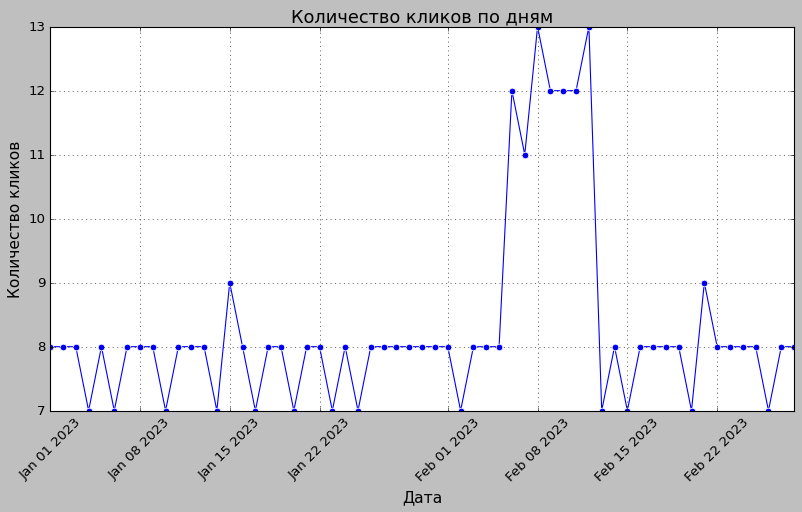

In [22]:
# Группируем по дате
df_clicked_daily = df_mde_clicked.groupby('date').agg({'user_id': 'count'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='user_id', data=df_clicked_daily, marker='o')
plt.title('Количество кликов по дням', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество кликов', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

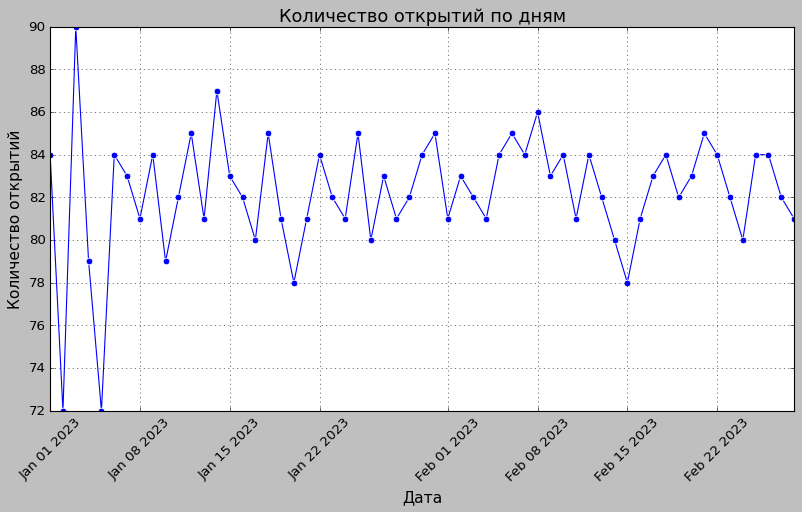

In [23]:
# Группируем по дате и считаем количество открытий
df_opened_daily = df_mde_opened.groupby('date').agg({'user_id': 'count'}).reset_index()

# Строим график
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='user_id', data=df_opened_daily, marker='o')
plt.title('Количество открытий по дням', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество открытий', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Сконцентрируем внимание на кликах. Мы можем явно наблюдать конкретный пик на графике.

#### Судя по графику - акция проводилась с 06.02.2023 по 12.02.2023. Попробуем суммаризировать идею через расчет средних кликов

In [26]:
# Объединяем открытия и клики
df = pd.merge(df_opened_daily, df_clicked_daily, on='date', how='outer', suffixes=('_opened', '_clicked')).fillna(0)

In [27]:
# Порог кликов, который считаем "высоким"
threshold = 9  # трешхолд для порога, т. к. в основном у нас по 8 кликов, есть несколько подскоков до 9, но выше - только во время той самой акции.

# Находим даты, где количество кликов больше порога
high_clicks = df[df['user_id_clicked'] > threshold]

print("Даты с высоким уровнем кликов:")
high_clicks[['date', 'user_id_clicked']]

Даты с высоким уровнем кликов:


,date,user_id_clicked
36,2023-02-06,12
37,2023-02-07,11
38,2023-02-08,13
39,2023-02-09,12
40,2023-02-10,12
41,2023-02-11,12
42,2023-02-12,13


#### Оценим, как изменились средние клики

In [29]:
# Дата начала и окончания акции
campaign_start = pd.to_datetime('2023-02-06')
campaign_end = pd.to_datetime('2023-02-12')

# Данные до начала акции (строго до 6 февраля)
df_before = df[df['date'] < campaign_start]

# Данные в период проведения акции (с 6 февраля по 12 февраля включительно)
df_campaign = df[(df['date'] >= campaign_start) & (df['date'] <= campaign_end)]

print(f"Количество дней до акции: {df_before.shape[0]}")
print(f"Количество дней в период акции: {df_campaign.shape[0]}")

# Среднее количество кликов
avg_clicks_before = df_before['user_id_clicked'].mean()
avg_clicks_campaign = df_campaign['user_id_clicked'].mean()

print(f"\nСреднее количество кликов до акции: {avg_clicks_before:.2f}")
print(f"Среднее количество кликов в период акции: {avg_clicks_campaign:.2f}")

increase = avg_clicks_campaign - avg_clicks_before
print(f"Увеличение среднего количества кликов: {increase:.2f}")

Количество дней до акции: 36
Количество дней в период акции: 7

Среднее количество кликов до акции: 7.78
Среднее количество кликов в период акции: 12.14
Увеличение среднего количества кликов: 4.37


### Выводы по заданию 3a:

Напомню, что, так как для нас приоритетная метрика - это шаг конверсии клик, то давайте оценим именно по числу кликов.


Можно заметить, что мы имеем некоторую компанию на заданном временном интервале.

Отвечая на поставленный вопрос - дата проведения предыдущей акции **с 2023-02-06 по 2023-02-12**; количество кликов увеличилось **в среднем на 4.37 клика, а именно от 2 до 5 кликов, в зависимости от сравниваемых дней**.

### Задание 3b

По этим же историческим данным проверьте - увеличила ли акция статистически значимо конверсию из открытия письма в переход (клик).

1. Сформулируйте нулевую и альтернативную гипотезы для проверки.
2. Определите с каким параметром статистической значимости вы будете смотреть результаты.

Выполняя расчет, вы можете использовать любой доступный вам инструмент.

#### Формулировка продуктовой гипотезы

"Последняя проведенная акция статистически значимо увеличила конверсию из открытия письма в переход (клик) на некоторый эффект"

$H_0$ - последняя проведенная акция НЕ оказала статистически значимого влияния на метрику конверсия из открытия письма в переход (клик);

$H_1$ - последняя проведенная акция оказала статистически значимого влияния на метрику конверсия из открытия письма в переход (клик)

#### Вероятности ошибок 1-2 рода

В экспериментах важную роль играют ошибки 1 и 2 рода, так как в зависимости от их допустимых значений будет изменяться дизайн A/B теста. Напомним определения:  

- **Ошибка первого рода** — отвергаем верную нулевую гипотезу. Нашли эффект там, где его нет  
- **Ошибка второго рода** — принимаем нулевую гипотезу, когда эффект существует. Пропустили эффект
$$\large
P\left( \left| \bar{Y} - \bar{X} \right| \geq \varepsilon \mid \mu_y - \mu_x = 0 \right) = \alpha
$$
$$\large
P\left( \bar{Y} - \bar{X} < \varepsilon \mid \mu_y = \mu_x (1 + \delta) \right) = \beta
$$

> **В данном эксперименте используем индустриальный стандарт в $\alpha = 0.05$ и $\beta = 0.2$**

#### Использую z-test для пропорций

In [34]:
campaign_start = pd.to_datetime('2023-02-06')
campaign_end = pd.to_datetime('2023-02-12')

df_before = df[df['date'] < campaign_start]

df_campaign = df[(df['date'] >= campaign_start) & (df['date'] <= campaign_end)]

# Считаем общее количество открытий и кликов
opens_before = df_before['user_id_opened'].sum()
clicks_before = df_before['user_id_clicked'].sum()

opens_campaign = df_campaign['user_id_opened'].sum()
clicks_campaign = df_campaign['user_id_clicked'].sum()

print(f"Открытия до акции: {opens_before}, Клики до акции: {clicks_before}")
print(f"Открытия в период акции: {opens_campaign}, Клики в период акции: {clicks_campaign}")

Открытия до акции: 2951, Клики до акции: 280
Открытия в период акции: 587, Клики в период акции: 85


In [35]:
# Успехи (число кликов) и испытания (число открытий)
successes = [clicks_before, clicks_campaign]
trials = [opens_before, opens_campaign]

# Проводим двусторонний Z-тест
stat, pval = proportions_ztest(successes, trials, alternative='two-sided')

print(f"\nZ-статистика: {stat:.4f}")
print(f"p-value: {pval:.4f}")

if pval < 0.05:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
else:
    print("Нет статистически значимого эффекта: не отвергаем нулевую гипотезу.")


Z-статистика: -3.6315
p-value: 0.0003
Результат статистически значим: отвергаем нулевую гипотезу.


### Выводы по заданию 3b:

| Показатель        | Значение  |
|:------------------|:----------|
| Z-статистика       | -3.6315   |
| p-value           | 0.0003    |
| Вывод             | Результат статистически значим: отвергаем нулевую гипотезу |


Мы нашли достаточно аргументов, чтобы отвергнуть гипотезу $H_0$ в пользу альтернативы $H_1$ - последняя проведенная акция оказала статистически значимое влияние на метрику конверсия из открытия письма в переход (клик).

### Задание 4a

Опишите AB-тест для пункта “Использовать более яркие и привлекательные заголовки в email-рассылках, чтобы привлечь внимание клиентов и заставить их нажать на ссылку” из задания 1.

Ответьте на 3 пункта ниже:
1. Сформулируйте нулевую и альтернативную гипотезы для проверки.
2. Определите с какими параметрами (уровень статистической значимости, размер выборки и параметры статистических тестов, такие как двусторонняя или односторонняя гипотеза и т. д.) вы будете проводить тестирование.
3. В зависимости от выбранных параметров рассчитайте требуемый размер выборки для анализа данных эксперимента.

При выполнении задания учитывайте, что на период тестирования новой фичи мы увеличим количество рассылаемых писем в 3 раза, и соответственно ожидаем, что количество открывших эти письма пропорционально увеличится примерно до 240 в день.

Выполняя расчет, вы можете использовать любой доступный вам инструмент.

### Дизайн эксперимента
#### Для пункта “Использовать более яркие и привлекательные заголовки в email-рассылках, чтобы привлечь внимание клиентов и заставить их нажать на ссылку”

#### Постановка бизнес-проблемы

**Бизнес-проблема**: низкая кликабельность ссылок в email-рассылках.

**Стоит ли проводить эксперимент?**  
Стоит, так как увеличение количества кликов по ссылкам из писем напрямую ведет к росту переходов на сайт, улучшению показателей вовлеченности и потенциальному росту продаж.

**Цель эксперимента**:  
Увеличить конверсию пользователей в клик по ссылке в письме с помощью изменения заголовков.

**Задачи эксперимента**:
- Разработать и внедрить альтернативный вариант email-рассылки с яркими и привлекательными заголовками;
- Подготовить метрики для оценки эффективности нового варианта.

**Целевая метрика эксперимента**:
- `click_rate` - конверсия в клик, рассчитываемая как отношение количества кликов к количеству открытий письма.

**Прокси-метрика эксперимента**:
- `open_rate` - конверсия в открытие письма, рассчитываемая как отношение количества открытий к количеству отправленных писем.


### Формулировка продуктовой гипотезы

"Внедрение более ярких и привлекательных заголовков в email-рассылках увеличит конверсию в клик по ссылке на 20%"

- $H_0$: изменение заголовков **не оказывает** статистически значимого влияния на метрику `click_rate`.
- $H_1$: изменение заголовков **оказывает** статистически значимое влияние на метрику `click_rate`.

> **В данном эксперименте снова используем индустриальные стандарты:**
> - Уровень значимости: $\alpha = 0.05$
> - Мощность теста: $1 - \beta = 0.8$ (где $\beta = 0.2$)

### Минимальный размер выборки
Класс `Designer` - это основной инструмент Ambrosia для расчета экспериментальных параметров.

К сожалению, в наших данных нет исторической информации о том, какие пользователи "несконверсились". Попробуем провести дизайн немного по-другому.

Зададим базовый уровень конверсии и, отталкиваясь от него, зададим сетку желаемых MDE и потенциально возможных размеров групп.

Текущий уровень конверсии из `open` в `click`:

In [42]:
# Количество всех открытий за весь исторический период
total_opens = df_mde_opened['user_id'].count()

# Количество всех кликов за весь исторический период
total_clicks = df_mde_clicked['user_id'].count()

# Базовая конверсия из открытия в клик
base_conversion_rate = total_clicks / total_opens

print(f"Базовая конверсия из открытия в клик: {base_conversion_rate:.4f} ({base_conversion_rate*100:.4f}%)")

Базовая конверсия из открытия в клик: 0.1010 (10.0968%)


In [43]:
conversion_rate =  0.1010

In [44]:
# стетка MDE и размеров групп
# Ошибки I и II типов будут иметь значения по умолчанию

effects = [1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]
group_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 75000, 100000]

#### Дизайн размеров групп: теоретический подход

In [46]:
design_binary(to_design='size',
              prob_a=conversion_rate,
              method='theory',
              effects=effects)

"Errors ($\alpha$, $\beta$)",(0.05; 0.2)
Effect,
5.0%,57119
10.0%,14582
15.0%,6612
20.0%,3792
25.0%,2473
30.0%,1749
35.0%,1308
40.0%,1018
45.0%,818


#### Дизайн размеров групп: подход через доверительные интервалы

In [48]:
design_binary(to_design='size',
              prob_a=conversion_rate,
              method='binary',
              effects=effects)

"Errors ($\alpha$, $\beta$)",(0.05; 0.2)
Effect,
5.0%,57496
10.0%,14539
15.0%,6674
20.0%,3771
25.0%,2481
30.0%,1737
35.0%,1305
40.0%,1024
45.0%,818


#### Дизайн минимально детектируемых эффектов при разных размерах группы

In [50]:
design_binary(to_design='effect',
              prob_a=conversion_rate,
              method='theory',
              sizes=group_sizes)

"Errors ($\alpha$, $\beta$)",(0.05; 0.2)
Group sizes,
1000,40.4%
2000,27.9%
3000,22.6%
4000,19.5%
5000,17.3%
6000,15.8%
7000,14.6%
8000,13.6%
9000,12.8%


#### Дизайн мощности теста при разных размерах групп

In [52]:
design_binary(to_design='power',
              prob_a=conversion_rate,
              method='theory',
              effects=effects,
              sizes=group_sizes)

Group sizes     1000   2000    3000    4000    5000    6000    7000    8000    \
$\alpha$ Effect                                                                 
0.05     5.0%     6.6%   8.2%    9.8%   11.5%   13.2%   14.8%   16.5%   18.2%   
         10.0%   11.4%  18.0%   24.6%   31.1%   37.5%   43.5%   49.3%   54.6%   
         15.0%   19.3%  33.8%   47.1%   58.7%   68.3%   76.1%   82.2%   86.9%   
         20.0%   30.1%  53.0%   70.3%   82.1%   89.6%   94.1%   96.8%   98.3%   
         25.0%   42.9%  71.2%   87.0%   94.6%   97.9%   99.2%   99.7%   99.9%   
         30.0%   56.3%  85.0%   95.6%   98.9%   99.7%   99.9%  100.0%  100.0%   
         35.0%   68.8%  93.4%   98.9%   99.8%  100.0%  100.0%  100.0%  100.0%   
         40.0%   79.3%  97.5%   99.8%  100.0%  100.0%  100.0%  100.0%  100.0%   
         45.0%   87.3%  99.2%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   
         50.0%   92.7%  99.8%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   

Group sizes      9000    10000   20000   30000   40000   50000   75000   \
$\alpha$ Effect                                                           
0.05     5.0%     19.9%   21.6%   38.1%   52.8%   65.0%   74.6%   89.4%   
         10.0%    59.5%   64.1%   90.7%   98.0%   99.6%   99.9%  100.0%   
         15.0%    90.5%   93.1%   99.8%  100.0%  100.0%  100.0%  100.0%   
         20.0%    99.1%   99.5%  100.0%  100.0%  100.0%  100.0%  100.0%   
         25.0%   100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   
         30.0%   100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   
         35.0%   100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   
         40.0%   100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   
         45.0%   100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   
         50.0%   100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   

Group sizes      100000  
$\alpha$ Effect          
0.05     5.0%     96.0%  
         10.0%   100.0%  
         15.0%   100.0%  
         20.0%   100.0%  
         25.0%   100.0%  
         30.0%   100.0%  
         35.0%   100.0%  
         40.0%   100.0%  
         45.0%   100.0%  
         50.0%   100.0%

### Выводы по заданию 4a:


#### Расчёт требуемого размера выборки

Текущая базовая конверсия click_rate: **10.10%**

#### Требуемый размер группы в зависимости от желаемого прироста (MDE):

| Ожидаемый прирост (MDE) | Размер группы (метод "theory") | Размер группы (метод "binary") |
|:------------------------|:-------------------------------|:-------------------------------|
| 5% | 57 119 | 56 729 |
| 10% | 14 582 | 14 522 |
| 15% | 6 612 | 6 635 |
| 20% | 3 792 | 3 743 |
| 25% | 2 473 | 2 463 |
| 30% | 1 749 | 1 760 |
| 35% | 1 308 | 1 312 |
| 40% | 1 018 | 1 025 |
| 45% | 818 | 812 |
| 50% | 673 | 681 |

Для запланированного прироста в **20%** требуется около **3 800 пользователей** в каждой группе.

#### Минимально детектируемый эффект (MDE) при фиксированных размерах групп:

| Размер группы | Минимально детектируемый эффект (MDE) |
|:--------------|:--------------------------------------|
| 1 000 | 40.4% |
| 2 000 | 27.9% |
| 3 000 | 22.6% |
| 4 000 | 19.5% |
| 5 000 | 17.3% |
| 10 000 | 12.1% |
| 20 000 | 8.5% |
| 30 000 | 6.9% |
| 40 000 | 6.0% |
| 50 000 | 5.3% |
| 75 000 | 4.4% |
| 100 000 | 3.8% |

#### Мощность теста при фиксированных размерах групп:


| Эффект | 1 000 | 5 000 | 10 000 | 20 000 | 50 000 |
|:-------|:------|:------|:-------|:-------|:-------|
| 5% | 5.0% | 11.5% | 19.9% | 21.6% | 65.0% |
| 10% | 11.4% | 37.5% | 64.1% | 90.7% | 99.9% |
| 15% | 19.3% | 68.3% | 93.1% | 99.8% | 100.0% |
| 20% | 30.1% | 89.6% | 99.5% | 100.0% | 100.0% |
| 25% | 42.9% | 97.9% | 100.0% | 100.0% | 100.0% |

#### Вывод по размеру выборки:

Так как на период теста ожидается **увеличение числа открытий до 240 в день**, а для эффекта в 20% требуется около **3 800 открытий на каждую группу**, минимальная продолжительность эксперимента составит:

$$
\text{Длительность теста} \approx \frac{3800}{240} \approx 16 \text{ дней на одну группу}
$$

Итого, полный эксперимент с двумя группами (контроль + тест) займет около **16 дней** при равномерной нагрузке.


#### Суммаризируя

- Требуемый размер выборки — около **3 800 пользователей на группу** при ожидаемом приросте click_rate на **20%**.
- При объёме 240 открытий в день на группу тест продлится примерно **16 дней**.

### Задание 4b

Вопросы с выбором правильного ответа:

**1. Какой параметр в статистическом тесте задаёт вероятность ошибки 1-го рода, т.е. когда мы неверно отвергаем нулевую гипотезу?**

Варианты ответа:
- **Уровень статистической значимости - ВЕРНО**
- Мощность статистического теста
- Степень однородности выборки
- Все перечисленные параметры
- Ни один из вариантов

**2. За вероятность ошибок 2-го рода отвечает параметр:**

Варианты ответа:
- Уровень статистической значимости
- **Мощность статистического теста - ВЕРНО**
- Тип гипотезы
- Все перечисленные параметры
- Ни один из вариантов

**3. Как изменится требуемый размер выборки при уменьшении вероятности ошибки 1-го рода (при неизменных остальных параметрах)?**

Варианты ответа:
- Уменьшится
- **Увеличится - ВЕРНО**
- Не изменится
- Зависит от статистического критерия

### Задание 5

Вы получили выгрузку по данным эксперимента за первые четыре дня после запуска.  
Проанализируйте корректность течения эксперимента, сделайте и зафиксируйте свои выводы.

Файл с данными — **Data for monitoring - first 4 days.csv**.

Важно: при проведении эксперимента в данных может присутствовать не одна аномалия. Придумайте, какими способами вы можете выявить аномалии в ходе эксперимента.

In [56]:
df_monitoring

,date,group,user_id,converted
0,01.03.2023,control,106085,1
1,01.03.2023,control,106086,1
2,01.03.2023,control,106087,1
3,01.03.2023,control,106088,1
4,01.03.2023,control,106089,1
...,...,...,...,...
961,04.03.2023,treatment,107046,0
962,04.03.2023,treatment,107047,0
963,04.03.2023,treatment,107048,0
964,04.03.2023,treatment,107049,0


In [57]:
# Быстрый просмотр структуры
df_monitoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       966 non-null    object
 1   group      966 non-null    object
 2   user_id    966 non-null    int64 
 3   converted  966 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 30.3+ KB


In [58]:
# Проверка наличия пропусков
print("\nПропуски в данных:")
df_monitoring.isnull().sum()


Пропуски в данных:


date         0
group        0
user_id      0
converted    0
dtype: int64

In [59]:
# Проверка распределения по группам
print("\nРаспределение по группам:")
df_monitoring['group'].value_counts()


Распределение по группам:


control      603
treatment    363
Name: group, dtype: int64

In [60]:
# Проверка базовых статистик по метрикам
print("\nБазовые описательные статистики:")
df_monitoring.describe()


Базовые описательные статистики:


,user_id,converted
count,966.00000,966.000000
mean,106567.50000,0.090062
std,279.00448,0.286419
min,106085.00000,0.000000
25%,106326.25000,0.000000
50%,106567.50000,0.000000
75%,106808.75000,0.000000
max,107050.00000,1.000000


In [61]:
# Проверка динамики по дням
if 'date' in df_monitoring.columns:
    print("\nРаспределение по дням:")
    print(df_monitoring['date'].value_counts())


Распределение по дням:
02.03.2023    246
04.03.2023    242
01.03.2023    241
03.03.2023    237
Name: date, dtype: int64


In [62]:
# Группировка по группе и расчёт конверсии
group_conversion = df_monitoring.groupby('group')['converted'].agg(['mean', 'count', 'sum']).reset_index()

# Переводим в проценты
group_conversion['conversion_rate (%)'] = group_conversion['mean'] * 100
group_conversion[['group', 'count', 'sum', 'conversion_rate (%)']]

,group,count,sum,conversion_rate (%)
0,control,603,58,9.618574
1,treatment,363,29,7.988981


### Выводы по заданию 5:

**Проведён базовый анализ данных за первые четыре дня эксперимента:**

- Пропуски в данных отсутствуют;
- Количество пользователей в контрольной группе (603) превышает количество пользователей в тестовой группе (363), что свидетельствует о нарушении баланса групп;
- Распределение по бинарной метрике `converted` (0 или 1) корректное, без выбросов.
- Средняя конверсия по всей выборке составляет примерно 9%.

Так как аномалия в контексте числа групп, напомню о способах разбиения.

##### Методы разбиения

***Случайные:***  

- RNG
- Hash split
- Стратифицированный

***С подбором:***  

- Метрический
- Парный
- По критериям однородности
- Комбинированный


Самый простой способ - **хэширование (Hash split)**

- Как работает онлайн-тестирование: клиент приходит на сервис (открывает письмо), у него есть кука/user_id, от него берется хэш, хэш в число, от числа остаток деления на 2, если число четное - целевая группа, нечетный хэш - контрольная группа.

**Преимущества метода:**  

- Детерминировано воспроизводимый результат;
- Почти неограниченное число способов разбиений;
- Равновероятное распределение по группам.

### Задание 6

После окончания А/В-теста вы получили файл с выгрузкой результатов (**Data for results.csv**).

- Рассчитайте статистическую значимость различий между группами.
- Сделайте выводы по проведенному расчету и интерпретируйте полученный результат.
- Проведите статистические тесты с различным уровнем статистической значимости (0.001, 0.01, 0.05, 0.15).

In [65]:
df_results.head()

,date,group,user_id,converted
0,01.03.2023,control,106085,1
1,01.03.2023,control,106086,1
2,01.03.2023,control,106087,1
3,01.03.2023,control,106088,1
4,01.03.2023,control,106089,1


In [66]:
significance_levels = [0.001, 0.01, 0.05, 0.15]

#### используем аргумент `binary`. Под капотом ряд реализаций, скорее, z-test для пропорций.

In [68]:
tester = Tester(dataframe=df_results,
                column_groups='group',
                metrics='converted',
                first_type_errors=significance_levels)

#### Абсолютный эффект метод `binary`

In [70]:
tester.run(effect_type='absolute',
           method='binary',
           metrics='converted',
           first_type_errors=significance_levels)

,first_type_error,pvalue,effect,confidence_interval,metric name,group A label,group B label
0,0.001,0.136429,0.027179,"(-0.0329, 0.0872)",converted,control,treatment
1,0.010,0.136429,0.027179,"(-0.0198, 0.0742)",converted,control,treatment
2,0.050,0.136429,0.027179,"(-0.0086, 0.0629)",converted,control,treatment
3,0.150,0.136429,0.027179,"(0.0009, 0.0535)",converted,control,treatment


#### Относительный эффект метод `binary`

In [72]:
tester.run(effect_type='relative',
           method='binary',
           metrics='converted',
           first_type_errors=significance_levels)

,first_type_error,pvalue,effect,confidence_interval,metric name,group A label,group B label
0,0.001,0.137283,0.273123,"(-0.2542, 1.1732)",converted,control,treatment
1,0.010,0.137283,0.273123,"(-0.1623, 0.9349)",converted,control,treatment
2,0.050,0.137283,0.273123,"(-0.0741, 0.7506)",converted,control,treatment
3,0.150,0.137283,0.273123,"(0.0076, 0.6087)",converted,control,treatment


### Выводы по заданию 6:

#### Результаты теста по абсолютной разнице:

| Уровень значимости ($\alpha$) | p-value | Эффект (разница в конверсии) | Доверительный интервал | Вывод |
|:------------------------------|:--------|:-----------------------------|:------------------------|:------|
| 0.001 | 0.136 | 0.0272 | (-0.0329, 0.0872) | Нет значимости |
| 0.010 | 0.136 | 0.0272 | (-0.0198, 0.0742) | Нет значимости |
| 0.050 | 0.136 | 0.0272 | (-0.0086, 0.0629) | Нет значимости |
| 0.150 | 0.136 | 0.0272 | (0.0009, 0.0535) | Значимость обнаружена |

**Интерпретация:**  
При уровнях значимости 0.001, 0.01 и 0.05, разница между контрольной и тестовой группами **не является статистически значимой**. Только при уровне $\alpha = 0.15$ доверительный интервал оказался полностью положительным, и нулевая гипотеза может быть отвергнута.

#### Результаты теста по относительной разнице:

| Уровень значимости ($\alpha$) | p-value | Эффект (относительное изменение) | Доверительный интервал | Вывод |
|:------------------------------|:--------|:---------------------------------|:------------------------|:------|
| 0.001 | 0.137 | +27.31% | (-25.42%, +117.32%) | Нет значимости |
| 0.010 | 0.137 | +27.31% | (-16.23%, +93.49%) | Нет значимости |
| 0.050 | 0.137 | +27.31% | (-7.41%, +75.06%) | Нет значимости |
| 0.150 | 0.137 | +27.31% | (+0.76%, +60.87%) | Значимость обнаружена |

**Интерпретация:**  
Аналогично абсолютному анализу, при $\alpha = 0.001$, $0.01$ и $0.05$ статистической значимости нет. Только при $\alpha = 0.15$ относительная разница становится статистически значимой.

#### Суммаризируем

- При индустриальных уровнях значимости ($\alpha = 0.05$) **различий между группами не обнаружено**.
- При более мягком уровне значимости ($\alpha = 0.15$) можно говорить о **наличии слабого статистического эффекта**.
- Однако при стандартных требованиях к надёжности результатов (например, в большинстве бизнес-кейсов) тест считается **неуспешным**: подтверждения значимого эффекта нет.

> **Вывод:** Изменение не оказало статистически значимого влияния на конверсию при стандартном уровне $\alpha=0.05$.

### Задание 7

Используя искусственные данные (например, сгенерированные из нормального распределения) выполните множественную проверку гипотез (для 5 гипотез) с помощью поправки Бонферрони или других методов, применимых для проблемы множественного тестирования.

Для проверки используйте уровень статистической значимости 0.05.

**Коррекция на множественные проверки гипотез в `Ambrosia`**

> Tester имеет возможность применять коррекцию на множественные проверки гипотез (MHC) к p-значениям и доверительным интервалам. Общее количество гипотез равно произведению числа комбинаций групп на количество переданных метрик.

> По умолчанию применяется коррекция Бонферрони, но её можно отключить, передав аргумент None в параметр correction_method.

#### Так как ровно 5 попарных сравнений провести невозможно (попарное сравнение приводит к четному числу гипотез в эксперименте), проведу 6 попарных сравнений, используя 4 уникальные группы.

In [77]:
total_size = 10000
groups = ['A', 'B', 'C', 'D']

In [78]:
np.random.seed(42)
multi_groups_result = pd.DataFrame(np.random.normal(size=(total_size, 1)),
                                   columns=['metric_1'])
multi_groups_result['groups'] = np.random.choice(groups, size=total_size)
multi_groups_result = multi_groups_result.sort_values('groups')

In [79]:
multi_tester = Tester(dataframe=multi_groups_result,
                      column_groups='groups',
                      metrics=['metric_1'])

Здесь у нас 6 уникальных пар для тестирования и 1 метрика, поэтому благодаря поправке Бонферрони p-значения уменьшатся в 6 раз, а CI увеличатся до соответствующих значений.

In [81]:
multi_tester.run(method='theory')

,first_type_error,pvalue,effect,confidence_interval,metric name,group A label,group B label
0,0.05,1.0,0.000164,"(-0.0752, 0.0755)",metric_1,A,B
1,0.05,1.0,-0.024261,"(-0.1002, 0.0517)",metric_1,A,C
2,0.05,1.0,-0.032808,"(-0.108, 0.0424)",metric_1,A,D
3,0.05,1.0,-0.024425,"(-0.099, 0.0502)",metric_1,B,C
4,0.05,1.0,-0.032972,"(-0.1068, 0.0409)",metric_1,B,D
5,0.05,1.0,-0.008547,"(-0.083, 0.0659)",metric_1,C,D


### Выводы по заданию 7:

**Параметры эксперимента:**
- Уровень значимости: $\alpha = 0.05$
- Метод тестирования: теоретический (`method='theory'`)
- Коррекция на множественные проверки: **Bonferroni**

#### Результаты множественного тестирования

| Пара | p-value (после коррекции) | Эффект | Доверительный интервал | Вывод |
|:----|:--------------------------|:-------|:------------------------|:------|
| A vs B | 1.0 | +0.0002 | (-0.0752, 0.0755) | Нет значимости |
| A vs C | 1.0 | -0.0243 | (-0.1002, 0.0517) | Нет значимости |
| A vs D | 1.0 | -0.0328 | (-0.1080, 0.0424) | Нет значимости |
| B vs C | 1.0 | -0.0244 | (-0.0990, 0.0502) | Нет значимости |
| B vs D | 1.0 | -0.0330 | (-0.1068, 0.0409) | Нет значимости |
| C vs D | 1.0 | -0.0085 | (-0.0830, 0.0659) | Нет значимости |

#### Интерпретация результатов

- Все p-value после применения поправки Бонферрони равны **1.0**.
- Ни в одной паре **нет статистически значимого различия** между группами при уровне значимости $\alpha = 0.05$.
- Доверительные интервалы для всех сравнений включают 0, что подтверждает отсутствие эффекта.


#### Суммаризируем

- Поправка Бонферрони существенно усилила требования к обнаружению эффекта (p-value стали гораздо больше).
- На сгенерированных данных из одного распределения ожидаемо **различий между группами не обнаружено**.
- Проведено корректное множественное тестирование с контролем уровня ошибки первого рода при множественных проверках.

> **Вывод:** Все 6 гипотез о равенстве средних в парах групп A, B, C, D **не были отвергнуты** при $\alpha=0.05$ с поправкой Бонферрони.